<a href="https://colab.research.google.com/github/fjme95/python-para-la-ciencia-de-datos/blob/main/3_Dependencias%2C_manejo_de_datos%2C_pandas_y_visualizaci%C3%B3n_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook veremos cómo cargar dependencias, como descargar datos, una introducción práctica a ```pandas``` y revisitaremos la visualización de los datos, esta vez con datos reales.

# Dependencias


Se ocupa ```import``` para agregar las librerias que utilizaremos. Se pueden ocupar las funciones, clases y variables de cada libreria que ocupemos usando el nombre de esta y luego el del recurso. Por ejemplo,

```python
import numpy 
numpy.array([12, 3, 4])
``` 

También, se puede crear un "alias" para las librerias ocupando ```as``` después del ```import``` (e.g. ```import numpy as np```), esto hará más corta la llamada a los recursos.

```python
import numpy as np
np.array([12, 3, 4])
```
Sí sólo se quiere ocupar una cantidad fija de funciones de la libreria, se pueden importar con ```import ... from ...```.
```python
from numpy import array, arange
array([1, 2, 3])
arange(10)
```

Finalmente, se pueden importar submódulos de la misma manera.

```python
import scipy.linalg as splinalg
splinalg.svds(A)
```


Para instalar dependencias que no estén por default en colab usamos 

```bash
!pip install <nombre o nombres separados por coma>
```

En particular, ```!``` le indicara a Jupyter que debe ejecutar un comando.

Para actualizar los paquetes usamos ```!pip install -U <nombre del paquete>```

In [1]:
!pip install -U plotly

     |████████████████████████████████| 23.9 MB 12 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import ssl # Para poder descargar los datos sin recibir ninguna excepción. Usualmente no es necesaria
import urllib.request as req # Descargar y guardar los datos
import zipfile # Descomprimir el archivo descargado

import pandas as pd # Manejar los datos
import numpy as np # Operaciones a los datos

import matplotlib.pyplot as plt # Graficar
import seaborn as sns
import plotly.express as px


In [3]:
sns.set_theme(style="whitegrid")

## Sobre vistas y copias

Cuando nosotros hacemos obtenemos una parte de un ```numpy.array``` (o ```pandas.DataFrame``` o ```pandas.Series```) mediante slicing o cualquier otra manera, lo que estamos haciendo es crear una *vista* de este arreglo inicial, por lo que cambios a la vista van a afectar al original. Para evitar este comportamiento es necesarios crear una copia con ```copy()```.

In [ ]:
arr = np.array(range(10))
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
vista = arr[:3]
vista

array([0, 1, 2])

In [ ]:
vista[:] = 0
vista

array([0, 0, 0])

In [ ]:
arr

array([0, 0, 0, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
copia = arr[:5].copy()
copia

array([0, 0, 0, 3, 4])

In [ ]:
copia[:] = 1
print(f'copia: {copia}')
print(f'arr: {arr}')

copia: [1 1 1 1 1]
arr: [0 0 0 3 4 5 6 7 8 9]


Este comportamiento es deseable. Imaginemos que queremos hacer el producto punto en dos matrices *gigantes*, en lugar de hacer la operación en las matrices completas que muy posiblemente llenaría la RAM, podemos hacer la operación por partes y tener el resultado al final sin tener que "juntar" estas partes.

# Manejando datos

Para tener datos en google colab hay cuatro maneras:
1. Subir los archivos manualmente abriendo el ícono de "folder" a la izquierda
2. Descargarlos de la web
3. Tener los datos en Google Drive y hacer la conexión
4. Usar datos de algún módulo (e.g. ```sklearn.datasets```)

Los descargaremos de la web y los guardaremos en el entorno de ejecución.


Los datos se obtuvieron de el [Bureau of Transportation Statistics](https://transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ). Estos datos contienen, para distintos vuelos comerciales, los aeropuertos de salida y llegada, horarios esperados y reales de despegue y aterrizaje, entre otras cosas.

In [4]:
ssl._create_default_https_context = ssl._create_unverified_context

# Descargar y guardar en un archivo llamado 'flights.zip'
req.urlretrieve("https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2013_1.zip", "flights.zip")

('flights.zip', <http.client.HTTPMessage at 0x7fd362224710>)

In [5]:
# Extrae el archivo descargado en la carpeta "data"
with zipfile.ZipFile('flights.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

## Lectura

Para leer los datos utilizaremos ```pandas.read_csv``` que lee un archivo csv en un ```pandas.DataFrame```.

Un DataFrame es una especie de tabla en la que cada fila tiene un índice y cada columna un nombre único. De ahora en adelante caso y fila serán intercambiables, así como columna y variable.

Cada columna tiene un sólo tipo de datos.

Además, los Data Frames nos brindan herramientas para manipular los datos eficientemente como filtros, agrupaciones, etc.

## Pandas.DataFrame

In [6]:
data_raw = pd.read_csv('data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2013_1.csv')
data_raw

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2013,1,1,17,4,2013-01-17,9E,20363,9E,N923XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1038.0,-7.0,0.0,0.0,-1.0,1000-1059,10.0,1048.0,1443.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,18,5,2013-01-18,9E,20363,9E,N907XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1037.0,-8.0,0.0,0.0,-1.0,1000-1059,17.0,1054.0,1452.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,19,6,2013-01-19,9E,20363,9E,N914XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1040,1035.0,-5.0,0.0,0.0,-1.0,1000-1059,10.0,1045.0,1506.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,1,1,20,7,2013-01-20,9E,20363,9E,N921XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1037.0,-8.0,0.0,0.0,-1.0,1000-1059,18.0,1055.0,1451.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,21,1,2013-01-21,9E,20363,9E,N937XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1044.0,-1.0,0.0,0.0,-1.0,1000-1059,11.0,1055.0,1437.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509514,2013,1,1,8,2,2013-01-08,MQ,20398,MQ,N620MQ,3485,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,710,707.0,-3.0,0.0,0.0,-1.0,0700-0759,18.0,725.0,821.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509515,2013,1,1,9,3,2013-01-09,MQ,20398,MQ,N603MQ,3485,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,710,926.0,136.0,136.

Podemos ver los nombres y tipo de cada variable con la función ```pandas.DataFrame.info()```

In [ ]:
data_raw.dtypes

Year                  int64
Quarter               int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
                     ...   
Div5TotalGTime      float64
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Unnamed: 109        float64
Length: 110, dtype: object

Para este ejercicio, sólo ocuparemos unas cuantas variables de todas las existentes para no hacer tan pesado el análisis. 

Hay dos maneras de quedarnos con el DataFrame con menos variables:

1. Eliminar las variables que no necesitamos
2. Seleccionar sólo las que necesitamos

Para eliminarlas se hace lo siguiente



In [ ]:
data_raw.drop(columns=['Year', 'Quarter', 'Month'])

,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,17,4,2013-01-17,9E,20363,9E,N923XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1038.0,-7.0,0.0,0.0,-1.0,1000-1059,10.0,1048.0,1443.0,8.0,1505,1451.0,-14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,5,2013-01-18,9E,20363,9E,N907XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1037.0,-8.0,0.0,0.0,-1.0,1000-1059,17.0,1054.0,1452.0,7.0,1505,1459.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,6,2013-01-19,9E,20363,9E,N914XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1040,1035.0,-5.0,0.0,0.0,-1.0,1000-1059,10.0,1045.0,1506.0,9.0,1458,1515.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,7,2013-01-20,9E,20363,9E,N921XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1037.0,-8.0,0.0,0.0,-1.0,1000-1059,18.0,1055.0,1451.0,4.0,1505,1455.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,1,2013-01-21,9E,20363,9E,N937XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1044.0,-1.0,0.0,0.0,-1.0,1000-1059,11.0,1055.0,1437.0,9.0,1505,1446.0,-19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509514,8,2,2013-01-08,MQ,20398,MQ,N620MQ,3485,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,710,707.0,-3.0,0.0,0.0,-1.0,0700-0759,18.0,725.0,821.0,4.0,830,825.0,-5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509515,9,3,2013-01-09,MQ,20398,MQ,N603MQ,3485,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,12451,1245102,31136,JAX,"Jackso

Se puede observar que las variables Year, Quarter y Month ya no están, pero si volvemos a imprimir el DataFrame, seguirán ahí. Esto pasa porque la función ```drop``` crea una copia del DataFrame sin las columnas (o filas) indicadas.

In [ ]:
data_raw

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2013,1,1,17,4,2013-01-17,9E,20363,9E,N923XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1038.0,-7.0,0.0,0.0,-1.0,1000-1059,10.0,1048.0,1443.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,18,5,2013-01-18,9E,20363,9E,N907XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1037.0,-8.0,0.0,0.0,-1.0,1000-1059,17.0,1054.0,1452.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,19,6,2013-01-19,9E,20363,9E,N914XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1040,1035.0,-5.0,0.0,0.0,-1.0,1000-1059,10.0,1045.0,1506.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,1,1,20,7,2013-01-20,9E,20363,9E,N921XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1037.0,-8.0,0.0,0.0,-1.0,1000-1059,18.0,1055.0,1451.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,21,1,2013-01-21,9E,20363,9E,N937XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1044.0,-1.0,0.0,0.0,-1.0,1000-1059,11.0,1055.0,1437.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509514,2013,1,1,8,2,2013-01-08,MQ,20398,MQ,N620MQ,3485,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,710,707.0,-3.0,0.0,0.0,-1.0,0700-0759,18.0,725.0,821.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509515,2013,1,1,9,3,2013-01-09,MQ,20398,MQ,N603MQ,3485,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,710,926.0,136.0,136.

In [ ]:
data_drop = data_raw.drop(columns=['Year', 'Quarter', 'Month'])
data_drop

,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,17,4,2013-01-17,9E,20363,9E,N923XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1038.0,-7.0,0.0,0.0,-1.0,1000-1059,10.0,1048.0,1443.0,8.0,1505,1451.0,-14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,5,2013-01-18,9E,20363,9E,N907XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1037.0,-8.0,0.0,0.0,-1.0,1000-1059,17.0,1054.0,1452.0,7.0,1505,1459.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,6,2013-01-19,9E,20363,9E,N914XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1040,1035.0,-5.0,0.0,0.0,-1.0,1000-1059,10.0,1045.0,1506.0,9.0,1458,1515.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,7,2013-01-20,9E,20363,9E,N921XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1037.0,-8.0,0.0,0.0,-1.0,1000-1059,18.0,1055.0,1451.0,4.0,1505,1455.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,1,2013-01-21,9E,20363,9E,N937XJ,3324,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1045,1044.0,-1.0,0.0,0.0,-1.0,1000-1059,11.0,1055.0,1437.0,9.0,1505,1446.0,-19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509514,8,2,2013-01-08,MQ,20398,MQ,N620MQ,3485,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,710,707.0,-3.0,0.0,0.0,-1.0,0700-0759,18.0,725.0,821.0,4.0,830,825.0,-5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509515,9,3,2013-01-09,MQ,20398,MQ,N603MQ,3485,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,12451,1245102,31136,JAX,"Jackso

Por otro lado, para sólo seleccionar las variables que sí queremos basta con escribirlas de la siguiente manera. Cabe notar que pasa lo mismo que con drop, se va a crear un copia del DataFrame con las columnas seleccionadas sin afectar al original.

In [ ]:
data_select = data_raw.loc[:, ['Year', 'Quarter', 'Month']]
data_select

,Year,Quarter,Month
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1
...,...,...,...
509514,2013,1,1
509515,2013,1,1
509516,2013,1,1
509517,2013,1,1


Para seleccionar filas o columnas por "nombre" usamos ```loc[<lista de filas>, <lista de columnas>]```, mientras que para seleccionarlas por posición usamos ```iloc[<lista de posiciones>, <lista de posiciones>]```

In [ ]:
data_raw.iloc[:10, :5]

,Year,Quarter,Month,DayofMonth,DayOfWeek
0,2013,1,1,17,4
1,2013,1,1,18,5
2,2013,1,1,19,6
3,2013,1,1,20,7
4,2013,1,1,21,1
5,2013,1,1,22,2
6,2013,1,1,23,3
7,2013,1,1,24,4
8,2013,1,1,25,5
9,2013,1,1,26,6


Estamos listos para seleccionar los datos que ocuparemos.

In [ ]:
# list(data_raw.keys())

In [12]:
columnas_filtro = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'OriginState', 'OriginCityName', 'Dest', 'DestState', 'DestCityName', 'DepTime', 'DepDelay', 'ArrTime', 'ArrDelay', 'Cancelled', 'Diverted', 'ActualElapsedTime', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
data = data_raw.loc[:, columnas_filtro]
data


,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2013,1,1,17,4,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1038.0,-7.0,1451.0,-14.0,0.0,0.0,193.0,1391.0,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,18,5,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1459.0,-6.0,0.0,0.0,202.0,1391.0,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,19,6,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1035.0,-5.0,1515.0,17.0,0.0,0.0,220.0,1391.0,0.0,0.0,17.0,0.0,0.0
3,2013,1,1,20,7,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1455.0,-10.0,0.0,0.0,198.0,1391.0,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,21,1,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1044.0,-1.0,1446.0,-19.0,0.0,0.0,182.0,1391.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509514,2013,1,1,8,2,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",707.0,-3.0,825.0,-5.0,0.0,0.0,78.0,335.0,NaN,NaN,NaN,NaN,NaN
509515,2013,1,1,9,3,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",926.0,136.0,1044.0,134.0,0.0,0.0,78.0,335.0,0.0,134.0,0.0,0.0,0.0
509516,2013,1,1,10,4,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",942.0,152.0,1055.0,145.0,0.0,0.0,73.0,335.0,64.0,81.0,0.0,0.0,0.0
509517,2013,1,1,11,5,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",708.0,-2.0,825.0,-5.0,0.0,0.0,77.0,335.0,NaN,NaN,NaN,NaN,NaN


### Iterar

Para iterar sobre cada columna del DataFrame, un for es suficiente ocupando ```items()``` en el DataFrame.

In [8]:
for i in ['a', 'b', 'c']:
    print(i)

a
b
c


In [10]:
for i, obj in enumerate(['a', 'b', 'c']):
    print(i)
    print(obj)

0
a
1
b
2
c


In [13]:
for i, (name, col) in enumerate(data.items()):
    print(f'\nColumna {i}: {name}\n')
    print(col)
    if i == 1:
        break


Columna 0: Year

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
509514    2013
509515    2013
509516    2013
509517    2013
509518    2013
Name: Year, Length: 509519, dtype: int64

Columna 1: Quarter

0         1
1         1
2         1
3         1
4         1
         ..
509514    1
509515    1
509516    1
509517    1
509518    1
Name: Quarter, Length: 509519, dtype: int64


Para iterar sobre las filas ocupamos ```iterrows()```

In [ ]:
for i, row in enumerate(data.iterrows()):
    print(f'\Fila {i}\n')
    print(row)
    if i == 1:
        break


\Fila 0

(0, Year                                  2013
Quarter                                  1
Month                                    1
DayofMonth                              17
DayOfWeek                                4
Reporting_Airline                       9E
Origin                                 DFW
OriginState                             TX
OriginCityName       Dallas/Fort Worth, TX
Dest                                   JFK
DestState                               NY
DestCityName                  New York, NY
DepTime                               1038
DepDelay                                -7
ArrTime                               1451
ArrDelay                               -14
Cancelled                                0
Diverted                                 0
ActualElapsedTime                      193
Distance                              1391
CarrierDelay                           NaN
WeatherDelay                           NaN
NASDelay                               Na

In [ ]:
for i, (name, row) in enumerate(data.iterrows()):
    print(f'\Fila {i}\n')
    print(row)
    if i == 1:
        break

\Fila 0

Year                                  2013
Quarter                                  1
Month                                    1
DayofMonth                              17
DayOfWeek                                4
Reporting_Airline                       9E
Origin                                 DFW
OriginState                             TX
OriginCityName       Dallas/Fort Worth, TX
Dest                                   JFK
DestState                               NY
DestCityName                  New York, NY
DepTime                               1038
DepDelay                                -7
ArrTime                               1451
ArrDelay                               -14
Cancelled                                0
Diverted                                 0
ActualElapsedTime                      193
Distance                              1391
CarrierDelay                           NaN
WeatherDelay                           NaN
NASDelay                               NaN
Se

In [15]:
for name, row in data.iterrows():
    print(f'\nFila {i}\n')
    print(row)
    print()
    print(row['OriginCityName'])
    break


Fila 1

Year                                  2013
Quarter                                  1
Month                                    1
DayofMonth                              17
DayOfWeek                                4
Reporting_Airline                       9E
Origin                                 DFW
OriginState                             TX
OriginCityName       Dallas/Fort Worth, TX
Dest                                   JFK
DestState                               NY
DestCityName                  New York, NY
DepTime                               1038
DepDelay                                -7
ArrTime                               1451
ArrDelay                               -14
Cancelled                                0
Diverted                                 0
ActualElapsedTime                      193
Distance                              1391
CarrierDelay                           NaN
WeatherDelay                           NaN
NASDelay                               NaN
Se

## Pandas.Series

Cada columna de un ```DataFrame``` es una serie de pandas, ```pandas.Series```. Para acceder a una columna de este lo hacemos como con los diccionarios.

In [16]:
data['Cancelled']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
509514    0.0
509515    0.0
509516    0.0
509517    0.0
509518    0.0
Name: Cancelled, Length: 509519, dtype: float64

O con la siguiente sintaxis

In [ ]:
data.Cancelled

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
509514    0.0
509515    0.0
509516    0.0
509517    0.0
509518    0.0
Name: Cancelled, Length: 509519, dtype: float64

In [ ]:
type(data.Cancelled)

pandas.core.series.Series

Se pueden hacer varias operaciones sobre las series que veremos conforme se necesiten.

# Análisis

Para el análisis vamos a querer responder las siguientes preguntas.

- ¿De qué aeropuerto salen más vuelos que no fueron cancelados ni desviados?
- ¿Qué aerolinea tiene más vuelos cancelados?
- ¿Qué aerolinea es la que presenta maś salidas antes de tiempo?
- ¿Cuántos vuelos fueron cancelados?
- ¿Cuánto fue lo máximo que se tardo un vuelo en despegar?
- ¿A qué estado llegan más vuelos y de dónde llegan estos vuelos?
- En promedio, ¿cuánto retraso tienen los vuelos que salen de California (CA)?

Por motivos didácticos, las preguntas se responderán viendo con gráficas y agregaciones.

In [ ]:
data.iloc[:5, :]

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2013,1,1,17,4,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1038.0,-7.0,1451.0,-14.0,0.0,0.0,193.0,1391.0,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,18,5,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1459.0,-6.0,0.0,0.0,202.0,1391.0,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,19,6,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1035.0,-5.0,1515.0,17.0,0.0,0.0,220.0,1391.0,0.0,0.0,17.0,0.0,0.0
3,2013,1,1,20,7,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1455.0,-10.0,0.0,0.0,198.0,1391.0,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,21,1,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1044.0,-1.0,1446.0,-19.0,0.0,0.0,182.0,1391.0,NaN,NaN,NaN,NaN,NaN


Para facilitar el análisis, separaremos el dataset en tres:

1. Vuelos que no fueron cancelados ni desviados
2. Vuelos cancelados
3. Vuelos desviados

In [17]:
data.Cancelled == 1

0         False
1         False
2         False
3         False
4         False
          ...  
509514    False
509515    False
509516    False
509517    False
509518    False
Name: Cancelled, Length: 509519, dtype: bool

In [20]:
cancelados = data[data.Cancelled == 1].copy()
print("##################\n")
print(f"En total, {cancelados.shape[0]} vuelos fueron cancelados")
print("\n##################\n")
cancelados

##################

En total, 7561 vuelos fueron cancelados

##################



,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
30,2013,1,1,16,3,9E,JFK,NY,"New York, NY",DFW,TX,"Dallas/Fort Worth, TX",NaN,NaN,NaN,NaN,1.0,0.0,NaN,1391.0,NaN,NaN,NaN,NaN,NaN
44,2013,1,1,30,3,9E,JFK,NY,"New York, NY",DFW,TX,"Dallas/Fort Worth, TX",NaN,NaN,NaN,NaN,1.0,0.0,NaN,1391.0,NaN,NaN,NaN,NaN,NaN
70,2013,1,1,21,1,9E,BNA,TN,"Nashville, TN",MSP,MN,"Minneapolis, MN",NaN,NaN,NaN,NaN,1.0,0.0,NaN,695.0,NaN,NaN,NaN,NaN,NaN
129,2013,1,1,16,3,9E,STL,MO,"St. Louis, MO",MSP,MN,"Minneapolis, MN",NaN,NaN,NaN,NaN,1.0,0.0,NaN,448.0,NaN,NaN,NaN,NaN,NaN
168,2013,1,1,4,5,9E,CVG,KY,"Cincinnati, OH",DCA,VA,"Washington, DC",NaN,NaN,NaN,NaN,1.0,0.0,NaN,411.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508936,2013,1,1,1,2,MQ,MIA,FL,"Miami, FL",PNS,FL,"Pensacola, FL",NaN,NaN,NaN,NaN,1.0,0.0,NaN,530.0,NaN,NaN,NaN,NaN,NaN
508979,2013,1,1,13,7,MQ,TLH,FL,"Tallahassee, FL",MIA,FL,"Miami, FL",NaN,NaN,NaN,NaN,1.0,0.0,NaN,402.0,NaN,NaN,NaN,NaN,NaN
509469,2013,1,1,25,5,MQ,CLT,NC,"Charlotte, NC",MIA,FL,"Miami, FL",NaN,NaN,NaN,NaN,1.0,0.0,NaN,650.0,NaN,NaN,NaN,NaN,NaN
509487,2013,1,1,12,6,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",1509.0,79.0,NaN,NaN,1.0,0.0,NaN,335.0,NaN,NaN,NaN,NaN,NaN


In [21]:
desviados = data[data.Diverted == 1].copy()
desviados

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
15,2013,1,1,1,2,9E,JFK,NY,"New York, NY",DFW,TX,"Dallas/Fort Worth, TX",1939.0,59.0,29.0,NaN,0.0,1.0,NaN,1391.0,NaN,NaN,NaN,NaN,NaN
16,2013,1,1,2,3,9E,JFK,NY,"New York, NY",DFW,TX,"Dallas/Fort Worth, TX",1848.0,8.0,2333.0,NaN,0.0,1.0,NaN,1391.0,NaN,NaN,NaN,NaN,NaN
22,2013,1,1,8,2,9E,JFK,NY,"New York, NY",DFW,TX,"Dallas/Fort Worth, TX",1612.0,7.0,2025.0,NaN,0.0,1.0,NaN,1391.0,NaN,NaN,NaN,NaN,NaN
39,2013,1,1,25,5,9E,JFK,NY,"New York, NY",DFW,TX,"Dallas/Fort Worth, TX",1729.0,84.0,2140.0,NaN,0.0,1.0,NaN,1391.0,NaN,NaN,NaN,NaN,NaN
43,2013,1,1,29,2,9E,JFK,NY,"New York, NY",DFW,TX,"Dallas/Fort Worth, TX",1559.0,-6.0,NaN,NaN,0.0,1.0,NaN,1391.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508701,2013,1,1,10,4,MQ,DFW,TX,"Dallas/Fort Worth, TX",VPS,FL,"Valparaiso, FL",1244.0,-1.0,NaN,NaN,0.0,1.0,NaN,641.0,NaN,NaN,NaN,NaN,NaN
509013,2013,1,1,16,3,MQ,MIA,FL,"Miami, FL",SDF,KY,"Louisville, KY",2136.0,21.0,120.0,NaN,0.0,1.0,NaN,910.0,NaN,NaN,NaN,NaN,NaN
509179,2013,1,1,4,5,MQ,MIA,FL,"Miami, FL",EYW,FL,"Key West, FL",1244.0,-6.0,1855.0,NaN,0.0,1.0,NaN,125.0,NaN,NaN,NaN,NaN,NaN
509386,2013,1,1,4,5,MQ,MIA,FL,"Miami, FL",EYW,FL,"Key West, FL",2017.0,7.0,825.0,NaN,0.0,1.0,NaN,125.0,NaN,NaN,NaN,NaN,NaN


In [22]:
normales = data[(data.Diverted == 0) & (data.Cancelled == 0)].copy()
normales

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2013,1,1,17,4,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1038.0,-7.0,1451.0,-14.0,0.0,0.0,193.0,1391.0,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,18,5,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1459.0,-6.0,0.0,0.0,202.0,1391.0,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,19,6,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1035.0,-5.0,1515.0,17.0,0.0,0.0,220.0,1391.0,0.0,0.0,17.0,0.0,0.0
3,2013,1,1,20,7,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1455.0,-10.0,0.0,0.0,198.0,1391.0,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,21,1,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1044.0,-1.0,1446.0,-19.0,0.0,0.0,182.0,1391.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509513,2013,1,1,7,1,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",704.0,-6.0,815.0,-15.0,0.0,0.0,71.0,335.0,NaN,NaN,NaN,NaN,NaN
509514,2013,1,1,8,2,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",707.0,-3.0,825.0,-5.0,0.0,0.0,78.0,335.0,NaN,NaN,NaN,NaN,NaN
509515,2013,1,1,9,3,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",926.0,136.0,1044.0,134.0,0.0,0.0,78.0,335.0,0.0,134.0,0.0,0.0,0.0
509516,2013,1,1,10,4,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",942.0,152.0,1055.0,145.0,0.0,0.0,73.0,335.0,64.0,81.0,0.0,0.0,0.0


## ¿De qué aeropuerto salen más vuelos que no fueron cancelados ni desviados?

En este caso, la variable que nos sirve es **Origin** pues tiene la clave del aeropuerto de origen del vuelo.

In [23]:
origen_agregado = normales.Origin.value_counts()
print(f"Cantidad total de aeropuertos: {origen_agregado.shape[0]}\n")
origen_agregado

Cantidad total de aeropuertos: 306



ATL    31984
ORD    23178
DFW    22895
DEN    17662
LAX    17385
       ...  
SHD       13
TTN       10
RFD        9
PPG        9
ADK        7
Name: Origin, Length: 306, dtype: int64

Aqui podemos observar que, en esta base de datos, el aeropuerto ATL (Aeropuerto de Atlanta) es el que tiene más, vuelos.

In [24]:
origen_agregado.index

Index(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'SFO', 'DTW', 'CLT',
       ...
       'GUC', 'GUM', 'BGR', 'AZA', 'OTH', 'SHD', 'TTN', 'RFD', 'PPG', 'ADK'],
      dtype='object', length=306)

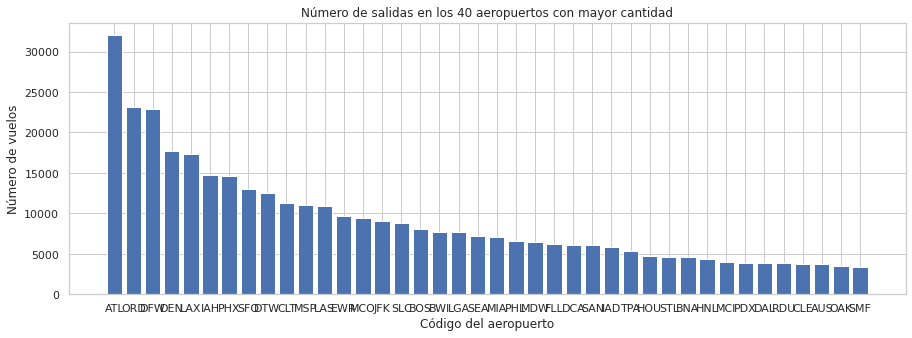

In [27]:
n_aeropuertos = 40

plt.figure(figsize=(15, 5))
plt.bar(x = origen_agregado.index.tolist()[:n_aeropuertos], height = origen_agregado[:n_aeropuertos])
plt.title(f'Número de salidas en los {n_aeropuertos} aeropuertos con mayor cantidad')
plt.xlabel('Código del aeropuerto')
plt.ylabel("Número de vuelos")

plt.show()


## ¿Qué aerolinea tiene más vuelos cancelados?

Ocuparemos el DataFrame ```cancelados``` que creamos al inicio.

Ya que este dataframe sólo tiene vuelos cancelados, basta con contar el número de veces que un aeropuerto aparece. Es parecido a la solución anterior

In [28]:
cancelados

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
30,2013,1,1,16,3,9E,JFK,NY,"New York, NY",DFW,TX,"Dallas/Fort Worth, TX",NaN,NaN,NaN,NaN,1.0,0.0,NaN,1391.0,NaN,NaN,NaN,NaN,NaN
44,2013,1,1,30,3,9E,JFK,NY,"New York, NY",DFW,TX,"Dallas/Fort Worth, TX",NaN,NaN,NaN,NaN,1.0,0.0,NaN,1391.0,NaN,NaN,NaN,NaN,NaN
70,2013,1,1,21,1,9E,BNA,TN,"Nashville, TN",MSP,MN,"Minneapolis, MN",NaN,NaN,NaN,NaN,1.0,0.0,NaN,695.0,NaN,NaN,NaN,NaN,NaN
129,2013,1,1,16,3,9E,STL,MO,"St. Louis, MO",MSP,MN,"Minneapolis, MN",NaN,NaN,NaN,NaN,1.0,0.0,NaN,448.0,NaN,NaN,NaN,NaN,NaN
168,2013,1,1,4,5,9E,CVG,KY,"Cincinnati, OH",DCA,VA,"Washington, DC",NaN,NaN,NaN,NaN,1.0,0.0,NaN,411.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508936,2013,1,1,1,2,MQ,MIA,FL,"Miami, FL",PNS,FL,"Pensacola, FL",NaN,NaN,NaN,NaN,1.0,0.0,NaN,530.0,NaN,NaN,NaN,NaN,NaN
508979,2013,1,1,13,7,MQ,TLH,FL,"Tallahassee, FL",MIA,FL,"Miami, FL",NaN,NaN,NaN,NaN,1.0,0.0,NaN,402.0,NaN,NaN,NaN,NaN,NaN
509469,2013,1,1,25,5,MQ,CLT,NC,"Charlotte, NC",MIA,FL,"Miami, FL",NaN,NaN,NaN,NaN,1.0,0.0,NaN,650.0,NaN,NaN,NaN,NaN,NaN
509487,2013,1,1,12,6,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",1509.0,79.0,NaN,NaN,1.0,0.0,NaN,335.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
agg_cancelados_aerolineas = cancelados.Reporting_Airline.value_counts()
agg_cancelados_aerolineas

EV    1656
OO    1344
MQ     966
9E     917
AA     863
WN     512
YV     312
DL     293
US     268
UA     221
AS      69
FL      63
B6      61
F9      12
HA       3
VX       1
Name: Reporting_Airline, dtype: int64

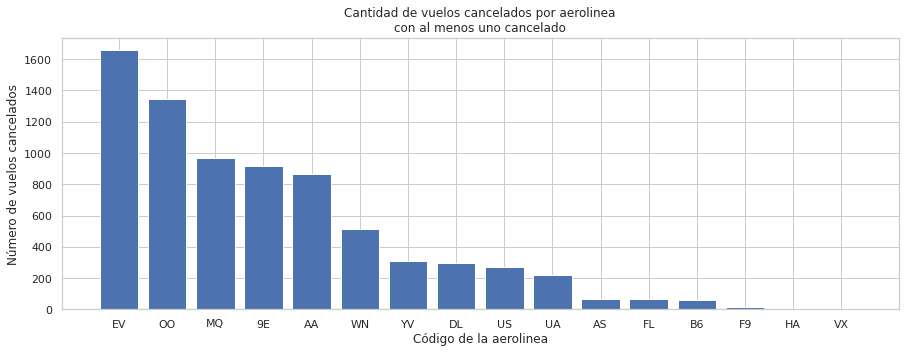

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(agg_cancelados_aerolineas.index.tolist(), agg_cancelados_aerolineas)
plt.title(f'Cantidad de vuelos cancelados por aerolinea\ncon al menos uno cancelado')
plt.xlabel('Código de la aerolinea')
plt.ylabel("Número de vuelos cancelados")

plt.show()

## ¿Qué aerolinea es la que presenta maś salidas antes de tiempo?

Ocuparemos el dataframe ```normales``` y haremos los siguientes pasos. Crearemos una nueva columna en los datos para verifiricar si su retraso es negativo. Después agruparemos por aerolinea y contaremos el número de casos en las que esta columna tiene True.

In [30]:
normales.head()
# normales.iloc[:5, :]

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2013,1,1,17,4,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1038.0,-7.0,1451.0,-14.0,0.0,0.0,193.0,1391.0,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,18,5,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1459.0,-6.0,0.0,0.0,202.0,1391.0,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,19,6,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1035.0,-5.0,1515.0,17.0,0.0,0.0,220.0,1391.0,0.0,0.0,17.0,0.0,0.0
3,2013,1,1,20,7,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1455.0,-10.0,0.0,0.0,198.0,1391.0,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,21,1,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1044.0,-1.0,1446.0,-19.0,0.0,0.0,182.0,1391.0,NaN,NaN,NaN,NaN,NaN


In [31]:
normales.DepDelay < 0

0          True
1          True
2          True
3          True
4          True
          ...  
509513     True
509514     True
509515    False
509516    False
509517     True
Name: DepDelay, Length: 500827, dtype: bool

In [32]:
normales['salida_temprana'] = normales.DepDelay < 0
# normales.loc[:, 'salida_temprana'] = normales.DepDelay < 0
normales

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,salida_temprana
0,2013,1,1,17,4,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1038.0,-7.0,1451.0,-14.0,0.0,0.0,193.0,1391.0,NaN,NaN,NaN,NaN,NaN,True
1,2013,1,1,18,5,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1459.0,-6.0,0.0,0.0,202.0,1391.0,NaN,NaN,NaN,NaN,NaN,True
2,2013,1,1,19,6,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1035.0,-5.0,1515.0,17.0,0.0,0.0,220.0,1391.0,0.0,0.0,17.0,0.0,0.0,True
3,2013,1,1,20,7,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1455.0,-10.0,0.0,0.0,198.0,1391.0,NaN,NaN,NaN,NaN,NaN,True
4,2013,1,1,21,1,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1044.0,-1.0,1446.0,-19.0,0.0,0.0,182.0,1391.0,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509513,2013,1,1,7,1,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",704.0,-6.0,815.0,-15.0,0.0,0.0,71.0,335.0,NaN,NaN,NaN,NaN,NaN,True
509514,2013,1,1,8,2,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",707.0,-3.0,825.0,-5.0,0.0,0.0,78.0,335.0,NaN,NaN,NaN,NaN,NaN,True
509515,2013,1,1,9,3,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",926.0,136.0,1044.0,134.0,0.0,0.0,78.0,335.0,0.0,134.0,0.0,0.0,0.0,False
509516,2013,1,1,10,4,MQ,MIA,FL,"Miami, FL",JAX,FL,"Jacksonville, FL",942.0,152.0,1055.0,145.0,0.0,0.0,73.0,335.0,64.0,81.0,0.0,0.0,0.0,False


In [33]:
normales.groupby('Reporting_Airline').salida_temprana.sum()

Reporting_Airline
9E    15841
AA    23008
AS     8609
B6    10812
DL    39675
EV    31709
F9     2442
FL    11521
HA     4287
MQ    22279
OO    31667
UA    19730
US    22278
VX     3052
WN    37904
YV     7181
Name: salida_temprana, dtype: int64

In [34]:
normales.groupby('Reporting_Airline').salida_temprana.sum().reset_index()

,Reporting_Airline,salida_temprana
0,9E,15841
1,AA,23008
2,AS,8609
3,B6,10812
4,DL,39675
5,EV,31709
6,F9,2442
7,FL,11521
8,HA,4287
9,MQ,22279


In [ ]:
salidas_tempranas = normales.groupby('Reporting_Airline').salida_temprana.sum().reset_index(name = 'n')
salidas_tempranas

,Reporting_Airline,n
0,9E,15841
1,AA,23008
2,AS,8609
3,B6,10812
4,DL,39675
5,EV,31709
6,F9,2442
7,FL,11521
8,HA,4287
9,MQ,22279


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

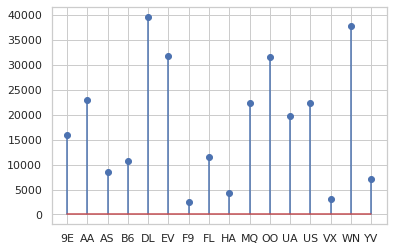

In [ ]:
plt.stem(salidas_tempranas.Reporting_Airline, salidas_tempranas.n)

## ¿Cuánto fue lo máximo que se tardo un vuelo en despegar?

In [ ]:
print(f'El vuelo que más tiempo se tardó en despegar tardó: {normales.DepDelay.max()} minutos')

El vuelo que más tiempo se tardó en despegar tardó: 1621.0 minutos


In [36]:
normales[normales.DepDelay == normales.DepDelay.max()]

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,salida_temprana
25701,2013,1,1,21,1,AA,MKE,WI,"Milwaukee, WI",DFW,TX,"Dallas/Fort Worth, TX",926.0,1621.0,1146.0,1591.0,0.0,0.0,140.0,853.0,0.0,1591.0,0.0,0.0,0.0,False


In [37]:
normales[normales.DepDelay == normales.DepDelay.min()]

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,salida_temprana
324381,2013,1,1,19,6,OO,APN,MI,"Alpena, MI",MSP,MN,"Minneapolis, MN",1608.0,-82.0,1703.0,-77.0,0.0,0.0,115.0,473.0,NaN,NaN,NaN,NaN,NaN,True


In [39]:
normales.DepDelay.var()

1112.0325679220207

In [41]:
normales.DepDelay

0          -7.0
1          -8.0
2          -5.0
3          -8.0
4          -1.0
          ...  
509513     -6.0
509514     -3.0
509515    136.0
509516    152.0
509517     -2.0
Name: DepDelay, Length: 500827, dtype: float64

In [53]:
data_plot = normales[(normales.DepDelay > 600) & (normales.OriginState == 'TX')].DestState.reset_index().rename(columns = {'index': 'n'})
data_plot

,n,DestState
0,70688,CA
1,256535,IL
2,258841,CA
3,491636,TX
4,496259,NE
5,496274,NE
6,507216,TX
7,508650,TX
8,508660,TX


<BarContainer object of 9 artists>

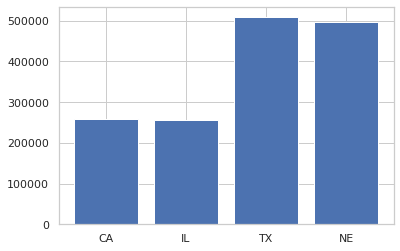

In [54]:
plt.bar(data_plot.DestState, data_plot.n)

## ¿A qué estado llegan más vuelos y de dónde llegan estos vuelos?

In [ ]:
normales.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,salida_temprana
0,2013,1,1,17,4,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1038.0,-7.0,1451.0,-14.0,0.0,0.0,193.0,1391.0,NaN,NaN,NaN,NaN,NaN,True
1,2013,1,1,18,5,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1459.0,-6.0,0.0,0.0,202.0,1391.0,NaN,NaN,NaN,NaN,NaN,True
2,2013,1,1,19,6,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1035.0,-5.0,1515.0,17.0,0.0,0.0,220.0,1391.0,0.0,0.0,17.0,0.0,0.0,True
3,2013,1,1,20,7,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1037.0,-8.0,1455.0,-10.0,0.0,0.0,198.0,1391.0,NaN,NaN,NaN,NaN,NaN,True
4,2013,1,1,21,1,9E,DFW,TX,"Dallas/Fort Worth, TX",JFK,NY,"New York, NY",1044.0,-1.0,1446.0,-19.0,0.0,0.0,182.0,1391.0,NaN,NaN,NaN,NaN,NaN,True


In [56]:
normales.groupby(['DestState', 'OriginState']).size()

DestState  OriginState
AK         AK             1901
           AZ               36
           CO               31
           HI               48
           IL                9
                          ... 
WY         MN                6
           NJ                2
           TX               23
           UT              271
           WY               60
Length: 1162, dtype: int64

In [58]:
by_states = normales.groupby(['DestState', 'OriginState']).size()
print(type(by_states))
by_states

<class 'pandas.core.series.Series'>


DestState  OriginState
AK         AK             1901
           AZ               36
           CO               31
           HI               48
           IL                9
                          ... 
WY         MN                6
           NJ                2
           TX               23
           UT              271
           WY               60
Length: 1162, dtype: int64

### Pequeña sección sobre gráficas (seaborn y plotly)

In [59]:
by_states.groupby(level = 0).sum()

DestState
AK     2770
AL     2830
AR     2467
AZ    16658
CA    59861
CO    20259
CT     1732
FL    38111
GA    33234
HI     8999
IA     1901
ID     1433
IL    31086
IN     3593
KS     1037
KY     4911
LA     5764
MA     8074
MD     7764
ME      507
MI    15137
MN    11624
MO     9271
MS     1249
MT     1110
NC    16846
ND     1403
NE     1965
NH      768
NJ     9646
NM     2273
NV    12434
NY    22480
OH     7648
OK     3553
OR     4818
PA    10402
PR     2471
RI     1139
SC     2670
SD      814
TN     8928
TT       40
TX    59685
UT     8925
VA    15361
VI      455
VT      404
WA     8203
WI     4940
WV      269
WY      905
dtype: int64

In [60]:
plot_data = by_states.groupby(level = 0).sum().reset_index(name = 'n')
print(type(plot_data))
plot_data

<class 'pandas.core.frame.DataFrame'>


,DestState,n
0,AK,2770
1,AL,2830
2,AR,2467
3,AZ,16658
4,CA,59861
5,CO,20259
6,CT,1732
7,FL,38111
8,GA,33234
9,HI,8999


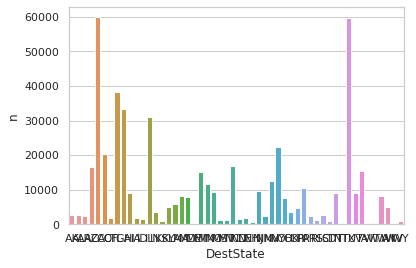

In [61]:
sns.barplot(x = 'DestState', y = 'n', data = plot_data)

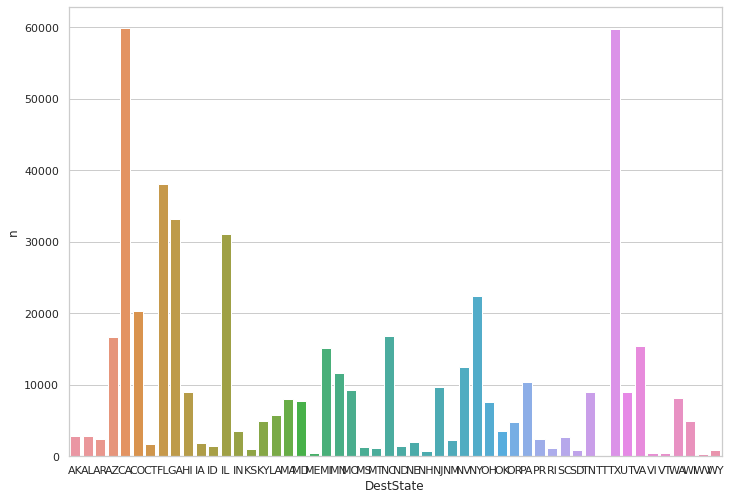

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x = 'DestState', y = 'n', data = plot_data)

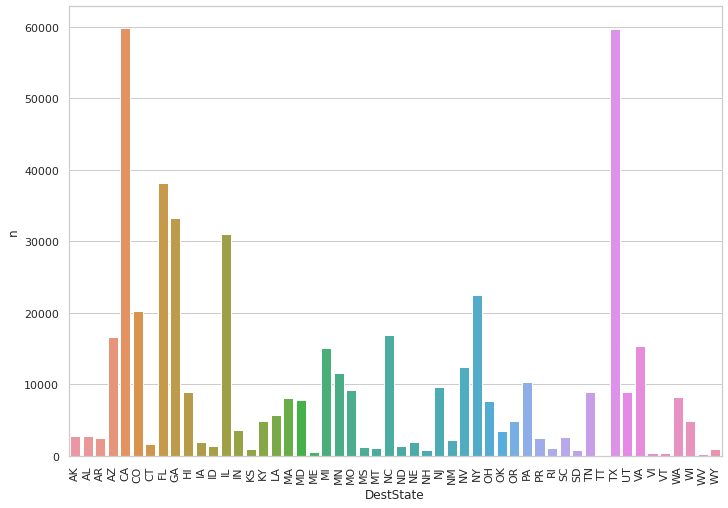

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation=90)
sns.barplot(x = 'DestState', y = 'n', data = plot_data)

In [65]:
my_plot = px.bar(data_frame = plot_data, x = 'DestState', y = 'n', title = 'El titulo')
my_plot.show()

In [64]:
my_plot.write_html('my_plot.html')

In [68]:
#Temas para las gráficas de plotly
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [66]:
px.bar(plot_data, 'DestState', 'n', template = 'plotly_dark')

In [69]:
pio.templates.default = "plotly_white"

In [70]:
px.bar(plot_data, 'DestState', 'n')

### De vuelta al análisis

In [71]:
by_states

DestState  OriginState
AK         AK             1901
           AZ               36
           CO               31
           HI               48
           IL                9
                          ... 
WY         MN                6
           NJ                2
           TX               23
           UT              271
           WY               60
Length: 1162, dtype: int64

In [ ]:
by_states.groupby(level = 0).sum()

DestState
AK     2770
AL     2830
AR     2467
AZ    16658
CA    59861
CO    20259
CT     1732
FL    38111
GA    33234
HI     8999
IA     1901
ID     1433
IL    31086
IN     3593
KS     1037
KY     4911
LA     5764
MA     8074
MD     7764
ME      507
MI    15137
MN    11624
MO     9271
MS     1249
MT     1110
NC    16846
ND     1403
NE     1965
NH      768
NJ     9646
NM     2273
NV    12434
NY    22480
OH     7648
OK     3553
OR     4818
PA    10402
PR     2471
RI     1139
SC     2670
SD      814
TN     8928
TT       40
TX    59685
UT     8925
VA    15361
VI      455
VT      404
WA     8203
WI     4940
WV      269
WY      905
dtype: int64

In [ ]:
airline = by_states.groupby(level = 0).sum().sort_values().tail(1)
airline

DestState
CA    59861
dtype: int64

In [73]:
by_states

DestState  OriginState
AK         AK             1901
           AZ               36
           CO               31
           HI               48
           IL                9
                          ... 
WY         MN                6
           NJ                2
           TX               23
           UT              271
           WY               60
Length: 1162, dtype: int64

In [ ]:
by_states[airline.index[0]].sort_values(ascending=False)

OriginState
CA    23206
AZ     5038
TX     4484
NV     4271
CO     3215
WA     2553
IL     2108
OR     1924
UT     1923
NY     1866
HI     1660
VA      967
FL      947
GA      940
PA      592
NJ      583
MA      577
MN      537
NM      371
NC      361
MO      308
MI      282
ID      238
TN      201
MD      153
OK      125
LA      112
OH      106
KY       81
WI       59
WY       58
MT       14
IN        1
dtype: int64

In [ ]:
result = by_states[airline.index[0]].sort_values(ascending=False).head(1)
print(f'El estado con más vuelos entrantes es {airline.index[0]} con un total de {airline[0]} vuelos, de los cuales el {round(result[0]/airline[0]*100, 2)}% ({result[0]}) provinieron de {result.index[0]}')

El estado con más vuelos entrantes es CA con un total de 59861 vuelos, de los cuales el 38.77% (23206) provinieron de CA


Hasta aqui ya termino  la respuesta

In [74]:
by_states

DestState  OriginState
AK         AK             1901
           AZ               36
           CO               31
           HI               48
           IL                9
                          ... 
WY         MN                6
           NJ                2
           TX               23
           UT              271
           WY               60
Length: 1162, dtype: int64

In [ ]:
by_states.unstack()

OriginState,AK,AL,AR,AZ,CA,CO,CT,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TT,TX,UT,VA,VI,VT,WA,WI,WV,WY
DestState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,1901.0,NaN,NaN,36.0,NaN,31.0,NaN,NaN,NaN,48.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,632.0,NaN,NaN,NaN
AL,NaN,NaN,NaN,NaN,NaN,51.0,NaN,216.0,1044.0,NaN,NaN,NaN,223.0,NaN,NaN,NaN,58.0,NaN,61.0,NaN,134.0,NaN,31.0,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,31.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,835.0,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN
AR,NaN,NaN,NaN,31.0,NaN,101.0,NaN,NaN,416.0,NaN,NaN,NaN,491.0,NaN,NaN,25.0,NaN,NaN,31.0,NaN,45.0,46.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,31.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN,1054.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZ,36.0,NaN,31.0,1164.0,5011.0,1052.0,NaN,355.0,384.0,191.0,61.0,93.0,666.0,113.0,NaN,31.0,31.0,114.0,124.0,NaN,210.0,352.0,348.0,NaN,NaN,247.0,NaN,122.0,NaN,241.0,435.0,937.0,157.0,120.0,118.0,297.0,310.0,NaN,NaN,NaN,NaN,84.0,NaN,1879.0,580.0,119.0,NaN,NaN,503.0,142.0,NaN,NaN
CA,NaN,NaN,NaN,5038.0,23206.0,3215.0,NaN,947.0,940.0,1660.0,NaN,238.0,2108.0,1.0,NaN,81.0,112.0,577.0,153.0,NaN,282.0,537.0,308.0,NaN,14.0,361.0,NaN,NaN,NaN,583.0,371.0,4271.0,1866.0,106.0,125.0,1924.0,592.0,NaN,NaN,NaN,NaN,201.0,NaN,4484.0,1923.0,967.0,NaN,NaN,2553.0,59.0,NaN,58.0
CO,31.0,52.0,101.0,1026.0,3196.0,1635.0,31.0,681.0,439.0,68.0,226.0,268.0,1065.0,154.0,63.0,61.0,185.0,156.0,148.0,NaN,222.0,450.0,546.0,NaN,398.0,180.0,545.0,280.0,31.0,255.0,132.0,631.0,377.0,271.0,366.0,425.0,232.0,NaN,31.0,NaN,155.0,288.0,NaN,2267.0,751.0,474.0,NaN,NaN,623.0,289.0,NaN,454.0
CT,NaN,NaN,NaN,NaN,NaN,31.0,NaN,387.0,164.0,NaN,NaN,NaN,283.0,NaN,NaN,67.0,NaN,NaN,181.0,NaN,111.0,60.0,NaN,NaN,NaN,156.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,31.0,31.0,NaN,NaN,NaN,NaN,NaN,91.0,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN
FL,NaN,218.0,NaN,356.0,948.0,681.0,388.0,2869.0,5346.0,NaN,NaN,NaN,1920.0,417.0,NaN,398.0,389.0,1189.0,1311.0,NaN,1089.0,537.0,499.0,31.0,NaN,2256.0,NaN,13.0,128.0,1736.0,NaN,226.0,4628.0,903.0,4.0,NaN,1795.0,987.0,288.0,92.0,NaN,692.0,NaN,3363.0,54.0,1855.0,136.0,NaN,100.0,269.0,NaN,NaN
GA,NaN,1043.0,411.0,383.0,938.0,454.0,164.0,5343.0,1657.0,30.0,141.0,NaN,1439.0,617.0,227.0,643.0,1113.0,403.0,547.0,23.0,660.0,461.0,821.0,435.0,9.0,2190.0,NaN,114.0,27.0,382.0,63.0,365.0,1711.0,993.0,284.0,79.0,1131.0,163.0,84.0,869.0,NaN,1361.0,NaN,2461.0,220.0,1952.0,37.0,NaN,205.0,431.0,141.0,9.0


In [ ]:
by_states.unstack().fillna(0)

OriginState,AK,AL,AR,AZ,CA,CO,CT,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TT,TX,UT,VA,VI,VT,WA,WI,WV,WY
DestState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,1901.0,0.0,0.0,36.0,0.0,31.0,0.0,0.0,0.0,48.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,632.0,0.0,0.0,0.0
AL,0.0,0.0,0.0,0.0,0.0,51.0,0.0,216.0,1044.0,0.0,0.0,0.0,223.0,0.0,0.0,0.0,58.0,0.0,61.0,0.0,134.0,0.0,31.0,0.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,31.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,835.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,0.0,0.0,0.0,31.0,0.0,101.0,0.0,0.0,416.0,0.0,0.0,0.0,491.0,0.0,0.0,25.0,0.0,0.0,31.0,0.0,45.0,46.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,31.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,1054.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ,36.0,0.0,31.0,1164.0,5011.0,1052.0,0.0,355.0,384.0,191.0,61.0,93.0,666.0,113.0,0.0,31.0,31.0,114.0,124.0,0.0,210.0,352.0,348.0,0.0,0.0,247.0,0.0,122.0,0.0,241.0,435.0,937.0,157.0,120.0,118.0,297.0,310.0,0.0,0.0,0.0,0.0,84.0,0.0,1879.0,580.0,119.0,0.0,0.0,503.0,142.0,0.0,0.0
CA,0.0,0.0,0.0,5038.0,23206.0,3215.0,0.0,947.0,940.0,1660.0,0.0,238.0,2108.0,1.0,0.0,81.0,112.0,577.0,153.0,0.0,282.0,537.0,308.0,0.0,14.0,361.0,0.0,0.0,0.0,583.0,371.0,4271.0,1866.0,106.0,125.0,1924.0,592.0,0.0,0.0,0.0,0.0,201.0,0.0,4484.0,1923.0,967.0,0.0,0.0,2553.0,59.0,0.0,58.0
CO,31.0,52.0,101.0,1026.0,3196.0,1635.0,31.0,681.0,439.0,68.0,226.0,268.0,1065.0,154.0,63.0,61.0,185.0,156.0,148.0,0.0,222.0,450.0,546.0,0.0,398.0,180.0,545.0,280.0,31.0,255.0,132.0,631.0,377.0,271.0,366.0,425.0,232.0,0.0,31.0,0.0,155.0,288.0,0.0,2267.0,751.0,474.0,0.0,0.0,623.0,289.0,0.0,454.0
CT,0.0,0.0,0.0,0.0,0.0,31.0,0.0,387.0,164.0,0.0,0.0,0.0,283.0,0.0,0.0,67.0,0.0,0.0,181.0,0.0,111.0,60.0,0.0,0.0,0.0,156.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,31.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0
FL,0.0,218.0,0.0,356.0,948.0,681.0,388.0,2869.0,5346.0,0.0,0.0,0.0,1920.0,417.0,0.0,398.0,389.0,1189.0,1311.0,0.0,1089.0,537.0,499.0,31.0,0.0,2256.0,0.0,13.0,128.0,1736.0,0.0,226.0,4628.0,903.0,4.0,0.0,1795.0,987.0,288.0,92.0,0.0,692.0,0.0,3363.0,54.0,1855.0,136.0,0.0,100.0,269.0,0.0,0.0
GA,0.0,1043.0,411.0,383.0,938.0,454.0,164.0,5343.0,1657.0,30.0,141.0,0.0,1439.0,617.0,227.0,643.0,1113.0,403.0,547.0,23.0,660.0,461.0,821.0,435.0,9.0,2190.0,0.0,114.0,27.0,382.0,63.0,365.0,1711.0,993.0,284.0,79.0,1131.0,163.0,84.0,869.0,0.0,1361.0,0.0,2461.0,220.0,1952.0,37.0,0.0,205.0,431.0,141.0,9.0


In [ ]:
print(by_states.unstack().fillna(0).index)
print(by_states.unstack().fillna(0).columns)

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS',
       'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TT', 'TX', 'UT', 'VA', 'VI', 'VT',
       'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='DestState')
Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS',
       'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TT', 'TX', 'UT', 'VA', 'VI', 'VT',
       'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='OriginState')


In [75]:
by_states.unstack().fillna(0).shape

(52, 52)

In [76]:
fig = px.imshow(
    by_states.unstack().fillna(0)
    )
fig.update_xaxes(side="top")
fig.show()

In [86]:
pd.DataFrame(np.array([['a', 'a', 'b'],['c', 'd', 'e'], [1, 2, 3]]).T, columns=['A', 'B', 'C'])

,A,B,C
0,a,c,1
1,a,d,2
2,b,e,3


In [87]:
pd.DataFrame(np.array([['a', 'a', 'b'],['c', 'd', 'e'], [1, 2, 3]]).T, columns=['A', 'B', 'C']).groupby(['A', 'B']).sum()

C
A B   
a c  1
  d  2
b e  3

In [85]:
pd.DataFrame(np.array([['a', 'a', 'b'],['c', 'd', 'e'], [1, 2, 3]]).T, columns=['A', 'B', 'C']).groupby(['A', 'B']).sum().unstack()

C          
B    c    d    e
A               
a    1    2  NaN
b  NaN  NaN    3

In [90]:
pd.DataFrame(np.array([['a', 'a', 'b'],['c', 'd', 'e'], [1, 2, 3]]).T, columns=['A', 'B', 'C']).groupby(['A', 'B']).sum().unstack().fillna(0)

C      
B  c  d  e
A         
a  1  2  0
b  0  0  3

## En promedio, ¿cuánto retraso tienen los vuelos que salen de California (CA)?

In [ ]:
normales[normales.OriginState == 'CA']

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginState,OriginCityName,Dest,DestState,DestCityName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,ActualElapsedTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,salida_temprana
19403,2013,1,1,1,2,AA,LAX,CA,"Los Angeles, CA",LIH,HI,"Lihue, HI",907.0,-3.0,1351.0,36.0,0.0,0.0,404.0,2615.0,0.0,0.0,36.0,0.0,0.0,True
19404,2013,1,1,2,3,AA,LAX,CA,"Los Angeles, CA",LIH,HI,"Lihue, HI",929.0,19.0,1357.0,42.0,0.0,0.0,388.0,2615.0,19.0,0.0,23.0,0.0,0.0,False
19405,2013,1,1,3,4,AA,LAX,CA,"Los Angeles, CA",LIH,HI,"Lihue, HI",912.0,2.0,1318.0,3.0,0.0,0.0,366.0,2615.0,NaN,NaN,NaN,NaN,NaN,False
19406,2013,1,1,4,5,AA,LAX,CA,"Los Angeles, CA",LIH,HI,"Lihue, HI",906.0,-4.0,1313.0,-2.0,0.0,0.0,367.0,2615.0,NaN,NaN,NaN,NaN,NaN,True
19407,2013,1,1,5,6,AA,LAX,CA,"Los Angeles, CA",LIH,HI,"Lihue, HI",957.0,47.0,1321.0,6.0,0.0,0.0,324.0,2615.0,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508480,2013,1,1,27,7,MQ,LAX,CA,"Los Angeles, CA",IAH,TX,"Houston, TX",1452.0,-3.0,2002.0,2.0,0.0,0.0,190.0,1379.0,NaN,NaN,NaN,NaN,NaN,True
508481,2013,1,1,28,1,MQ,LAX,CA,"Los Angeles, CA",IAH,TX,"Houston, TX",1452.0,-3.0,1950.0,-10.0,0.0,0.0,178.0,1379.0,NaN,NaN,NaN,NaN,NaN,True
508482,2013,1,1,29,2,MQ,LAX,CA,"Los Angeles, CA",IAH,TX,"Houston, TX",1453.0,-2.0,2004.0,4.0,0.0,0.0,191.0,1379.0,NaN,NaN,NaN,NaN,NaN,True
508483,2013,1,1,30,3,MQ,LAX,CA,"Los Angeles, CA",IAH,TX,"Houston, TX",1503.0,8.0,1951.0,-9.0,0.0,0.0,168.0,1379.0,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
media = normales[normales.OriginState == 'CA'].DepDelay.mean()
media

4.47698374241842

In [ ]:
print(f'En promedio, se tardan {media} minutos después del horario establecido')

En promedio, se tardan 4.47698374241842 minutos después del horario establecido


In [ ]:
# https://plotly.com/python/distplot/
px.histogram(normales[normales.OriginState == 'CA'].DepDelay, marginal="box")

# Ejercicios

Responder las siguientes preguntas escribiendo el código debajo de cada una

## ¿Qué día de la semana hay más vuelos con salidas retrasadas?

## ¿A qué aeropuertos llegan mas vuelos que no fueron cancelados ni desviados?

Muestra el top 5

## ¿Qué aerolinea tiene más vuelos retrasados al despegue?

## ¿Cuántos vuelos se vieron afectados negativamente por el clima?

## ¿En qué mes se presenta la mayor cantidad de vuelos afectados por el clima?

## Graficar un histograma de los tiempos de vuelo del aeropuerto DFW a JFK

## ¿En qué día de la semana hay más vuelos?

Obtener la respuesta gráficando y obteniendo el número.

## ¿Qué par de aerolineas presentan los tiempos de vuelo con la mayor varianza?

## Realizar el heatmap hecho en "¿A qué estado llegan más vuelos y de dónde salen estos vuelos?" usando seaborn.

# ligas útiles
- DataFrames: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
- Series: https://pandas.pydata.org/docs/reference/api/pandas.Series.html